<a href="https://colab.research.google.com/github/ManikaNagpal/Waste_Segregation/blob/master/BT21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#You first need to download the files and upload them in your Drive.
#The files are available on my github: https://github.com/ManikaNagpal/Waste_Segregation.
#Downloadand upload the two folders namely : BT21 and BT21_Test.
#Then you can mount your own drive using the code below.

from google.colab import drive
drive.mount('/content/drive')
data_root='/content/drive/My Drive/BT21'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 8, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Using TensorFlow backend.


In [3]:
#Part 2

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

Training_data_dir = str(data_root)+'/Train'
print(Training_data_dir);

Valid_data_dir = str(data_root)+'/Valid'
print(Valid_data_dir);

training_set = train_datagen.flow_from_directory(Training_data_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 159,
                                                 shuffle=True,
                                                 seed=12345,                                                 
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(Valid_data_dir,
                                            target_size = (64, 64),
                                            batch_size = 44,
                                            shuffle=False,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         steps_per_epoch = 159,
                         epochs = 2,
                         validation_data = valid_set,   
                         validation_steps = 44)


/content/drive/My Drive/BT21/Train
/content/drive/My Drive/BT21/Valid
Found 159 images belonging to 8 classes.
Found 44 images belonging to 8 classes.
Epoch 1/2
159/159 [==============================] - 243s 2s/step - loss: 0.2602 - accuracy: 0.9171 - val_loss: 1.2238 - val_accuracy: 0.8636
Epoch 2/2
159/159 [==============================] - 242s 2s/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 1.3144 - val_accuracy: 0.8636


Enter the character you want to see (Chimmy/Cooky/Koya/Mang/RJ/Shooky/Tata/Van): Cooky


Text(0.5, 1.0, "Hello! My name is 'Cooky' and computer thinks my name is 'Cooky'")

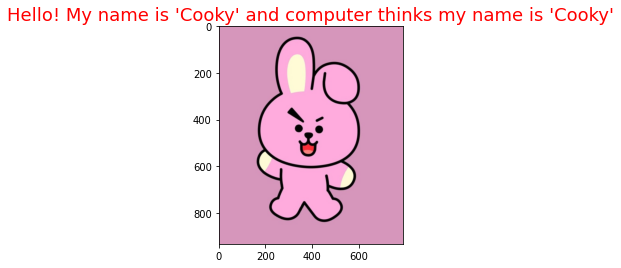

In [4]:
# Part 3 - Making new predictions: Meeting the BT21 Characters
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_root='/content/drive/My Drive/BT21Test'

name = input("Enter the character you want to see (Chimmy/Cooky/Koya/Mang/RJ/Shooky/Tata/Van): ")

character = image.load_img(test_root+ '/' + name + '.jpg')
test_image = image.load_img(test_root+ '/' + name + '.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

#print(result)
if result[0][0] == 1:
    prediction = 'Chimmy'
#    print(prediction)
elif result[0][1] == 1:
    prediction = 'Cooky'
#    print(prediction)  
elif result[0][2] == 1:
    prediction = 'Koya'
#    print(prediction)
elif result[0][3] == 1:
    prediction = 'Mang'
#    print(prediction)
elif result[0][4] == 1:
    prediction = 'RJ'
#    print(prediction)
elif result[0][5] == 1:
    prediction = 'Shooky'
#    print(prediction)
elif result[0][6] == 1:
    prediction = 'Tata'
#    print(prediction)   
else:
    prediction = 'Van'
#    print(prediction)

plt.imshow(character)
c = "Hello! My name is '"+name+"' and computer thinks my name is '" +prediction +"'"
plt.title(c,color='red',fontsize = 18)
